## <center> Аттестация. Практическое задание в Jupiter

В данном блоке вам предстоит решить задачу, которую автор когда-то решал на одном из своих собеседований.
Вам предоставлена таблица с данными (скачать файл можно на платформе) о ежедневной выработке энергии солнечными батареями. Информация в ней содержится в двух столбцах: 
* date - дата наблюдения
* cum_power - накопленная (кумулятивная) выработка энергии на указанный день

То есть перед вами классический пример временного ряда: числовой показатель, зависящий от времени. Давайте с ним поработаем.


In [24]:
import pandas as pd
import numpy as np
import plotly.express as px

In [25]:
# Загрузим данные и выведем основную информацию о столбцах

df = pd.read_csv('solarpower.zip') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       664 non-null    object 
 1   cum_power  664 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.5+ KB


In [26]:
df.head()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


1. В нашем временном ряде есть несколько пропусков, они обозначены числом -1. Заполните пропуски средним арифметическим между двумя соседними наблюдениями: </p>
    $$x^*_i  = \frac{x_{i-1} + x_{i+1}}{2}$$ 
    
Совет: проще всего будет сделать это, используя цикл по индексам элементов столбца cum_power, но вы можете предложить более изящное решение.


In [27]:
# Найдем индексы строк, в которых есть пропущенные значения, обозначенные -1
gap_index = list(df.loc[df['cum_power']==-1].index)  

# Заполним занчения средними посчитанные по соседним ячейкам
for i in gap_index:
    df['cum_power'][i] = (df['cum_power'][i-1] + df['cum_power'][i+1]) / 2

print(df['cum_power'][gap_index])

45     20255.0
647    27998.0
Name: cum_power, dtype: float64


C:\Users\saakyan.ag\AppData\Local\Temp/ipykernel_19416/3897881273.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2. Теперь, когда таблица заполнена, создайте столбец day_power - ежедневный прирост выработки солнечной энергии.

    После чего создайте данные о ежемесячной выработке энергии на каждый год. 
    
Совет: для того, чтобы выделить из даты год и месяц проще всего воспользоваться методом аксессора dt.to_period('M'), который позволяет выделять периоды, в данном случае 'М' - месяц.

In [28]:
# Преобразуем столбец date в тип даты и переведем в месяцы

df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.to_period('M')

In [29]:
# Заполним пропуски нулевым значением

df['day_power'] = df['cum_power'].diff()
df['day_power'] = df['day_power'].fillna(0)
df.head(10)

,date,cum_power,day_power
0,2017-01,20111.0,0.0
1,2017-01,20112.0,1.0
2,2017-01,20115.0,3.0
3,2017-01,20117.0,2.0
4,2017-01,20119.0,2.0
5,2017-01,20125.0,6.0
6,2017-01,20129.0,4.0
7,2017-01,20130.0,1.0
8,2017-01,20131.0,1.0
9,2017-01,20132.0,1.0


3. Постройте график временного ряда - ежемесячной выработки солнечной энергии. Не забудьте подписать оси и сам график.
Укажите в какие сезоны наблюдается подъем, а в какие спад?

In [30]:
# Сгруппируем по дате, получив тем самым данные за весь месяц о выработке электронергии

grouped_df = df.groupby('date',as_index=False).sum()

# Переведем дату обратно из периода для корректного отображения

grouped_df['date'] = grouped_df['date'].dt.to_timestamp()

In [31]:
grouped_df

,date,cum_power,day_power
0,2017-01-01,624746.0,97.0
1,2017-02-01,567197.0,104.0
2,2017-03-01,633782.0,334.0
3,2017-04-01,626551.0,489.0
4,2017-05-01,663651.0,589.0
5,2017-06-01,662047.0,645.0
6,2017-07-01,702680.0,562.0
7,2017-08-01,718539.0,467.0
8,2017-09-01,707203.0,346.0
9,2017-10-01,739608.0,199.0


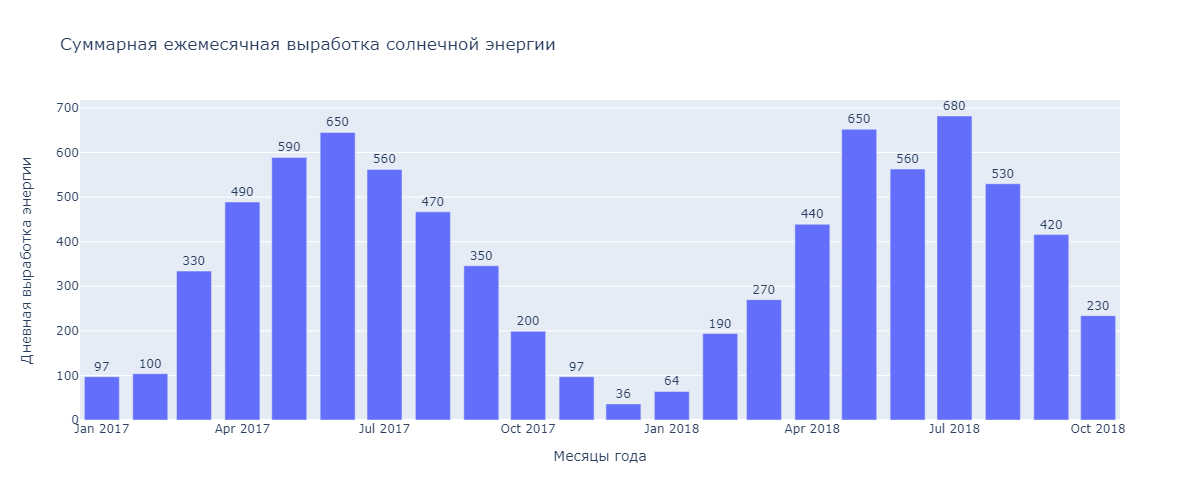

In [32]:
# Построим график ежемесячной выработки электроэнергии

fig = px.bar(
    grouped_df,
    x='date',
    y='day_power',
    title='Суммарная ежемесячная выработка солнечной энергии',
    labels={'date':'Месяцы года','day_power':'Дневная выработка энергии'},
    width=1200,
    text_auto='.2s'
)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.show("png")

Выводы:

Совершенно естественно, что в зимние месяцы выработка солнечной энергии снижена из-за малых часов светового дня, в то время как в летнее и весеннее время световых часов больше. Кроме того провал в июне 2018 года может быть связан с излишней засушливостью, что могли спровоцировать загрязнение песчиной пылью светоприемных панелей.